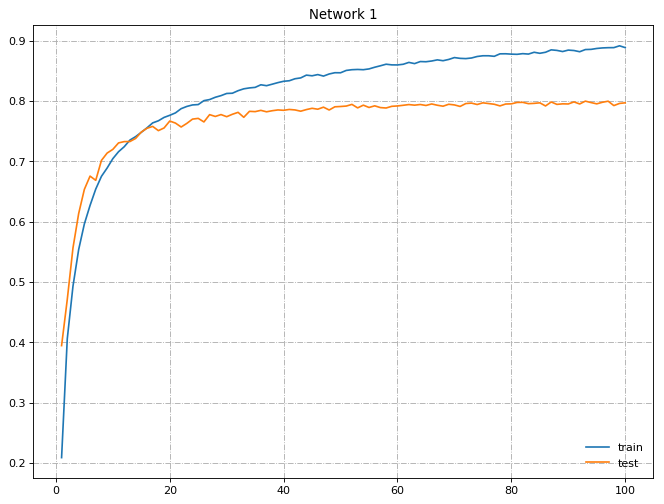

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.figure(num=None, figsize=(10, 7.5), dpi=80, facecolor='w', edgecolor='k')

epochs = np.arange(1,101)
#print epochs

train_acc_mod1 = []
test_acc_mod1 = []

with open('saved_models/cifar10-1/run-log-temp.txt', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        train_acc_mod1.append(float(row[0]))
        test_acc_mod1.append(float(row[1]))
        
#print test_acc
plt.clf()
#plt.yticks(np.arange(0,101))
plt.plot(epochs,train_acc_mod1,label='train')
plt.plot(epochs,test_acc_mod1,label='test')
plt.legend(loc='lower right', frameon=False)
plt.title("Network 1")
plt.grid(linestyle = '-.')
plt.show()


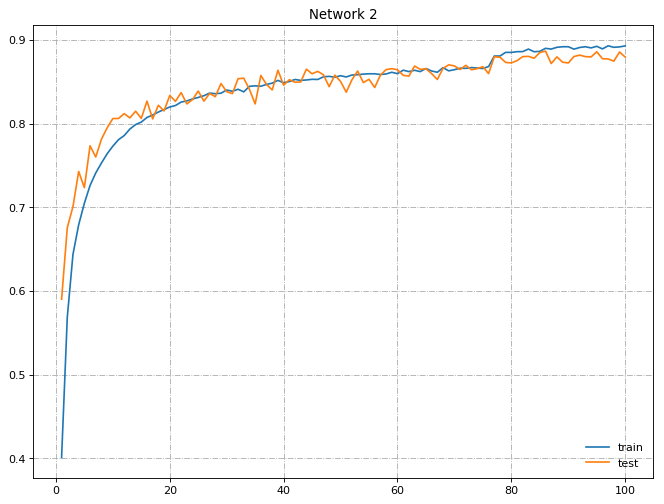

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.figure(num=None, figsize=(10, 7.5), dpi=80, facecolor='w', edgecolor='k')

epochs = np.arange(1,101)
#print epochs

train_acc_mod2 = []
test_acc_mod2 = []

with open('saved_models/cifar10-90/run-log-temp.txt', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        train_acc_mod2.append(float(row[0]))
        test_acc_mod2.append(float(row[1]))
        
#print test_acc
plt.clf()
#plt.yticks(np.arange(0,101))
plt.plot(epochs,train_acc_mod2,label='train')
plt.plot(epochs,test_acc_mod2,label='test')
plt.legend(loc='lower right', frameon=False)
plt.title("Network 2")
plt.grid(linestyle = '-.')
plt.show()


# Trying to test h5py library
Kera saves the weights in a special binary format.

In [58]:
import h5py
import os
import glob
import shutil
from joblib import Parallel, delayed
import multiprocessing



NOISE_RATIO = 0.0005
STANDARD_DEV = 0.0005

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

def visitor_func(name, node):
    if isinstance(node, h5py.Dataset):
        print "*processing of node " + name
        current_params = np.array(node).flatten()
        for x in range(len(current_params)):
            if (np.random.uniform(0.0,1.0)) < NOISE_RATIO:
                noise = np.random.normal(0.0,STANDARD_DEV)
                current_params[x] = current_params[x] + noise
        current_params = np.reshape(current_params,node.shape)
        for index, x in np.ndenumerate(current_params):
            node[index] = x
        
        
def h5py_visit_file(file_name):
    with h5py.File(file_name, 'r+') as f:
        print "processign file " + file_name
        f.visititems(visitor_func)
        
        
def model_params(dir='saved_models/cifar10-1/'):
    global weight_params
    if os.path.exists('/tmp/zknw/'):
        shutil.rmtree('/tmp/zknw/')
    os.mkdir('/tmp/zknw/')
    copytree(dir,'/tmp/zknw/')
    files = glob.glob('/tmp/zknw/'+"weights*.h5")
    files = sorted(files)
    cnt = 0
    procs = []
    for file_name in files:
        if cnt < len(files):
            proc = multiprocessing.Process(target = h5py_visit_file, args = (file_name,))
            procs.append(proc)
            #h5py_visit_file(file_name)
        else:
            break
        cnt = cnt + 1
        #print (weight_params.shape)
    
    for i in range(len(procs)):
        procs[i].start()
    
    for i in range(len(procs)):
        procs[i].join()

model_params('saved_models/cifar10-1/')
print 'finished'

processign file /tmp/zknw/weights-epoch-00000000.h5
*processing of node conv2d_1/conv2d_1/bias:0
processign file /tmp/zknw/weights-epoch-00000001.h5
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_1/conv2d_1/bias:0
processign file /tmp/zknw/weights-epoch-00000002.h5
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_1/conv2d_1/bias:0
processign file /tmp/zknw/weights-epoch-00000003.h5
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_1/conv2d_1/bias:0
processign file /tmp/zknw/weights-epoch-00000004.h5
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_1/conv2d_1/bias:0
processign file /tmp/zknw/weights-epoch-00000005.h5
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_1/conv2d_1/bias:0
processign file /tmp/zknw/weights-epoch-00000006.h5
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_2/conv2d_2/b

processign file /tmp/zknw/weights-epoch-00000036.h5
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_2/conv2d_2/bias:0
processign file /tmp/zknw/weights-epoch-00000037.h5
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_2/conv2d_2/kernel:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_1/conv2d_1/bias:0
*processing of node conv2d_1/conv2d_1/bias:0
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_2/conv2d_2/kernel:0
*processing of node conv2d_1/conv2d_1/kernel:0
processign file /tmp/zknw/weights-epoch-00000038.h5
*processing of node conv2d_2/conv2d_2/bias:0
processign file /tmp/zknw/weights-epoch-00000039.h5
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_1/conv2d_1/bias:0
*processing of node conv2d_2/conv2d_2/kernel:0
*processing of node conv2d_1/conv2d_1/kernel:0
*processi

processign file /tmp/zknw/weights-epoch-00000062.h5
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_1/conv2d_1/bias:0
*processing of node conv2d_2/conv2d_2/kernel:0
*processing of node conv2d_2/conv2d_2/kernel:0
processign file /tmp/zknw/weights-epoch-00000063.h5
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_1/conv2d_1/bias:0
*processing of node conv2d_2/conv2d_2/kernel:0
*processing of node conv2d_1/conv2d_1/kernel:0
processign file /tmp/zknw/weights-epoch-00000064.h5
*processing of node conv2d_1/conv2d_1/bias:0
processign file /tmp/zknw/weights-epoch-00000065.h5
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_2/conv2d_2/kernel:0
*processing of node conv2d_1/conv2d_1/bias:0
processign file /tmp/zknw/weights-epoch-00000066.h5
*pro

*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_1/conv2d_1/kernel:0
processign file /tmp/zknw/weights-epoch-00000090.h5
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_1/conv2d_1/bias:0
*processing of node conv2d_2/conv2d_2/kernel:0
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_3/conv2d_3/kernel:0
processign file /tmp/zknw/weights-epoch-00000091.h5
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_1/conv2d_1/bias:0
*processing of node conv2d_2/conv2d_2/bias:0
*processing of node conv2d_1/conv2d_1/kernel:0
*processing of node conv2d_3/conv2d_3/bias:0
processign file /tmp/zknw/weights-epoch-00000092.h5
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_1/conv2d_1/bias:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of n

*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_3/conv2d_3/bias:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_3/conv2d_3/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d

*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node conv2d_4/conv2d_4/bias:0
*processing of node conv2d_4/conv2d_4/kernel:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/k

*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/bias:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_1/kernel:0
*processing of node dense_1/dense_

*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dense_2/kernel:0
*processing of node dense_2/dense_2/bias:0
*processing of node dense_2/dens

## Testing for range of values

In [16]:
import h5py
import os
import glob
import shutil
from joblib import Parallel, delayed

#f = h5py.File('saved_models/cifar10-1/weights-epoch-00000000.h5', 'r')
#print f.keys()
#print f.values()
#f.close()

#f[u'conv2d_1'][u'conv2d_1'][u'bias:0'].attrs.keys()
#print np.array(f[u'conv2d_1'][u'conv2d_1'][u'bias:0']).shape
#print np.array(f[u'conv2d_1'][u'conv2d_1'][u'kernel:0']).shape
#print f[u'conv2d_1'][u'conv2d_1'].items()

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)


NOISE_RATIO = 0.2
STANDARD_DEV = 0.0005
min_f = float('inf')
max_f = float('-inf')

def visitor_func(name, node):
    global min_f, max_f
    if isinstance(node, h5py.Dataset):
         # node is a dataset
        #print node.name + " with shape: "
        #print np.array(node).flatten().shape
        #weight_params = np.append(weight_params,np.array(node).flatten())
        #print "*processing of node " + name
        current_params = np.array(node).flatten()
        if min_f > np.ndarray.min(current_params):
            min_f = np.ndarray.min(current_params)
        if max_f < np.ndarray.max(current_params):
            max_f = np.ndarray.max(current_params)
        
        for x in range(len(current_params)):
            if (np.random.uniform(0.0,1.0)) < NOISE_RATIO:
                noise = np.random.normal(0.0,STANDARD_DEV)
                current_params[x] = current_params[x] + noise
        
        #current_params = np.reshape(current_params,node.shape)
        #for index, x in np.ndenumerate(current_params):
        #   node[index] = x
        
def h5py_visit_file(file_name):
    with h5py.File(file_name, 'r+') as f:
        #print "processign file " + file_name
        f.visititems(visitor_func)
        
        
def model_params(dir='saved_models/cifar10-1/'):
    global weight_params
    if os.path.exists('/tmp/zknw/'):
        shutil.rmtree('/tmp/zknw/')
    os.mkdir('/tmp/zknw/')
    copytree(dir,'/tmp/zknw/')
    files = glob.glob('/tmp/zknw/'+"weights*.h5")
    files = sorted(files)
    cnt = 0
    for file_name in files:
        weight_params = []
        if cnt < len(files):
            #Parallel(n_jobs=2, backend="threading")(map(h5py_visit_file,file_name))
            #Parallel(n_jobs=3)(h5py_visit_file(file_name))
            h5py_visit_file(file_name)
        else:
            break
        cnt = cnt + 1
        #print (weight_params.shape)
        
    return 0

model_params('saved_models/cifar10-1/')
print "**min is: " + str(min_f)
print "**max is: " + str(max_f)
print 'finished'

**min is: -1.020404
**max is: 2.1215513
finished


# Checking Validity: if noised version still maintain most weights for parameter 0.2

In [48]:
import h5py
import os
import glob
import shutil
from joblib import Parallel, delayed

NOISE_RATIO = 0.2
STANDARD_DEV = 0.0005

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)


w_o_noise = np.empty(shape = (0,))
w_noise =  np.empty(shape = (0,))
with_noise = False

def visitor_func(name, node):
    global w_o_noise
    global w_noise
    global with_noise
    if isinstance(node, h5py.Dataset):
        current_params = np.array(node).flatten()
        if with_noise:
            w_noise = np.append(w_noise,current_params)
        else:
            w_o_noise = np.append(w_o_noise,current_params)
        
def h5py_visit_file(file_name):
    with h5py.File(file_name, 'r+') as f:
        print "processign file " + file_name
        f.visititems(visitor_func)
        
        
def model_params(dir='saved_models/cifar10-1/'):
    global w_o_noise
    global w_noise
    global with_noise
    #if os.path.exists('/tmp/zknw/'):
        #shutil.rmtree('/tmp/zknw/')
    #os.mkdir('/tmp/zknw/')
    #copytree(dir,'/tmp/zknw/')
    files = glob.glob(dir+'weights*.h5')
    files = sorted(files)
    cnt = 0
    for file_name in files:
        if cnt < len(files):
        #if cnt < 10:
            h5py_visit_file(file_name)
        else:
            break
        cnt = cnt + 1

model_params('saved_models/cifar10-1/')
with_noise = True
model_params('/tmp/zknw/')

total_equal = 0
total_not_equal = 0

w_noise = np.array(w_noise)
w_o_noise = np.array(w_o_noise)
assert(w_noise.shape == w_o_noise.shape)

total_equal = np.sum(w_noise == w_o_noise)
total_not_equal = np.sum(w_noise != w_o_noise)

print ("total equal is: ", total_equal)
print ("total not equal is: ", total_not_equal)
print 'finished'

processign file saved_models/cifar10-1/weights-epoch-00000000.h5
processign file saved_models/cifar10-1/weights-epoch-00000001.h5
processign file saved_models/cifar10-1/weights-epoch-00000002.h5
processign file saved_models/cifar10-1/weights-epoch-00000003.h5
processign file saved_models/cifar10-1/weights-epoch-00000004.h5
processign file saved_models/cifar10-1/weights-epoch-00000005.h5
processign file saved_models/cifar10-1/weights-epoch-00000006.h5
processign file saved_models/cifar10-1/weights-epoch-00000007.h5
processign file saved_models/cifar10-1/weights-epoch-00000008.h5
processign file saved_models/cifar10-1/weights-epoch-00000009.h5
processign file /tmp/zknw/weights-epoch-00000000.h5
processign file /tmp/zknw/weights-epoch-00000001.h5
processign file /tmp/zknw/weights-epoch-00000002.h5
processign file /tmp/zknw/weights-epoch-00000003.h5
processign file /tmp/zknw/weights-epoch-00000004.h5
processign file /tmp/zknw/weights-epoch-00000005.h5
processign file /tmp/zknw/weights-epoc

# Just Some Validity Checks

In [57]:
import h5py
import os
import glob
import shutil
from joblib import Parallel, delayed
from __future__ import division

# NOISE_RATIO = 0.2
# STANDARD_DEV = 0.0005

w_o_noise = np.empty(shape = (0,))
w_noise =  np.empty(shape = (0,))
with_noise = False

def visitor_func(name, node):
    global w_o_noise
    global w_noise
    global with_noise
    if isinstance(node, h5py.Dataset):
        current_params = np.array(node).flatten()
        if with_noise:
            w_noise = np.append(w_noise,current_params)
        else:
            w_o_noise = np.append(w_o_noise,current_params)
        
def h5py_visit_file(file_name):
    with h5py.File(file_name, 'r+') as f:
        #print "processign file " + file_name
        f.visititems(visitor_func)
        
        
def model_params(dir='saved_models/cifar10-1/'):
    global w_o_noise
    global w_noise
    global with_noise

    files = glob.glob(dir+'weights*.h5')
    files = sorted(files)
    cnt = 0
    for file_name in files:
        if cnt < len(files):
        #if cnt < 10:
            h5py_visit_file(file_name)
        else:
            break
        cnt = cnt + 1

model_params('saved_models/cifar10-1/')
with_noise = True
model_params('saved_models/cifar10-1-noise-0.005-0.0005/')

total_equal = 0
total_not_equal = 0

w_noise = np.array(w_noise)
w_o_noise = np.array(w_o_noise)
assert(w_noise.shape == w_o_noise.shape)

total_equal = np.sum(w_noise == w_o_noise)
total_not_equal = np.sum(w_noise != w_o_noise)

print ("total equal is: ", total_equal)
print ("total not equal is: ", total_not_equal)
print ("Ratio is: ", (total_not_equal/(total_equal + total_not_equal)))
print 'finished'

('total equal is: ', 124450200)
('total not equal is: ', 635600)
('Ratio is: ', 0.0050813121873146275)
finished


1. 3 dataset test [DONE]
2. 80,10,10 test
3. change the value of std, and proportions